1. [Загрузка данных](#start)


2. [Проведения исследовательского анализа данных (EDA)](#EDA)
    * [Пороверка датасета на отсутствующие значения (пропуски)](#a)
    * [Изучение среднего значения и стандартного отклонения ](#b)
    * [Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#c)
    * [Построение матрицы корреляции и отобразите её](#d)
    

3. [Построение модели прогнозирования оттока клиентов](#model)   
    * [Разделение данных на обучающую и валидационную выборку функцией train_test_split()](#aa)
    * [Обучение модели на train-выборке двумя способами](#bb)
        * [Логистическая регрессия](#bba)
        * [Случайный лес](#bbaa)


4. [Кластеризация клиентов](#clustering)
    * [Стандартизация данных](#aaa)
    * [Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков и построение дендрограммы](#bbb)
    * [Обучение модели кластеризации на основании алгоритма K-Means и прогнозирование кластеров клиентов ](#ccc)
    * [Просмотр средних значений признаков для кластеров](#ddd)
    * [Построение распределения признаков для кластеров](#eee)
    * [Для каждого полученного кластера подсчет доли оттока](#fff)
    
    
5. [Выводы](#aaaa)    

## Загрузка данных
<a id="start"></a> 

In [1]:
import pandas as pd #импортирование библиотек
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('...') #чтение датасета

In [3]:
data.head().T #просмотр датасета

,0,1,2,3,4
gender,1.000000,0.000000,0.000000,0.000000,1.000000
Near_Location,1.000000,1.000000,1.000000,1.000000,1.000000
Partner,1.000000,0.000000,1.000000,1.000000,1.000000
Promo_friends,1.000000,0.000000,0.000000,1.000000,1.000000
Phone,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,6.000000,12.000000,1.000000,12.000000,1.000000
Group_visits,1.000000,1.000000,0.000000,1.000000,0.000000
Age,29.000000,31.000000,28.000000,33.000000,26.000000
Avg_additional_charges_total,14.227470,113.202938,129.448479,62.669863,198.362265
Month_to_end_contract,5.000000,12.000000,1.000000,12.000000,1.000000


`'gender'` — пол;

`'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;

`'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

`Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

`'Phone'` — наличие контактного телефона;

`'Contract_period'` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

`'Group_visits'` — факт посещения групповых занятий;

`'Age'` — возраст;

`'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

`'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);

`'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах). 

`'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;

`'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;

`'Churn'` — факт оттока в текущем месяце.

In [4]:
data.info() #просмотр информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
data['Avg_additional_charges_total'] = data['Avg_additional_charges_total'].round(2) #изменение знаков после запятой
data['Month_to_end_contract'] = data['Month_to_end_contract'].round(2)
data['Avg_class_frequency_total'] = data['Avg_class_frequency_total'].round(2)
data['Avg_class_frequency_current_month'] = data['Avg_class_frequency_current_month'].round(2)

In [6]:
data.head().T #просмотр измененого датасета

,0,1,2,3,4
gender,1.00,0.00,0.00,0.00,1.00
Near_Location,1.00,1.00,1.00,1.00,1.00
Partner,1.00,0.00,1.00,1.00,1.00
Promo_friends,1.00,0.00,0.00,1.00,1.00
Phone,0.00,1.00,1.00,1.00,1.00
Contract_period,6.00,12.00,1.00,12.00,1.00
Group_visits,1.00,1.00,0.00,1.00,0.00
Age,29.00,31.00,28.00,33.00,26.00
Avg_additional_charges_total,14.23,113.20,129.45,62.67,198.36
Month_to_end_contract,5.00,12.00,1.00,12.00,1.00


**Вывод:**

В датасете все типы данных правильные. В типе данных `float64`, колличество знаков после запятой было уменьшено до 2х.

## Проведения исследовательского анализа данных (EDA)
<a id="EDA"></a> 

### Пороверка датасета на отсутствующие значения (пропуски)
<a id="a"></a> 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
Near_Location,4000.0,0.85,0.36,0.00,1.00,1.00,1.00,1.00
Partner,4000.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
Promo_friends,4000.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00
Phone,4000.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
Contract_period,4000.0,4.68,4.55,1.00,1.00,1.00,6.00,12.00
Group_visits,4000.0,0.41,0.49,0.00,0.00,0.00,1.00,1.00
Age,4000.0,29.18,3.26,18.00,27.00,29.00,31.00,41.00
Avg_additional_charges_total,4000.0,146.94,96.36,0.15,68.86,136.22,210.95,552.59
Month_to_end_contract,4000.0,4.32,4.19,1.00,1.00,1.00,6.00,12.00


**Вывод:**

В датасете пропусков обнаружено не было. Так же не выявлено явных дубликатов. Стандартное отклонение в в большенстве колонок близко к среднему значению, на первый взгля явных выбросов не видно.

### Просмотр среднего значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
<a id="b"></a> 

In [13]:
data.groupby('Churn').mean().T.round(2)

Churn,0,1
gender,0.51,0.51
Near_Location,0.87,0.77
Partner,0.53,0.36
Promo_friends,0.35,0.18
Phone,0.90,0.90
Contract_period,5.75,1.73
Group_visits,0.46,0.27
Age,29.98,26.99
Avg_additional_charges_total,158.45,115.08
Month_to_end_contract,5.28,1.66


**Вывод:**

- `gender`: у данного столбца одинаковые показатель оттока/притока тем самым можно сказать, что данный признак не является показательным.
- `Near_Location`: данный признак находится на большом показателе, что говорит о том что по нему большой процент оттока и притока клиентов. Но сами показатели равноценны, из-за чего можно сказать, что они сильно не влияют на клиентов.
- `Partner`: по показателям оттока/притока данного столбца, можно сказать, что сотрудники компании-партнёра остаются чаще чем обычные посетители.
- `Promo_friends`: показатель данного столбца ниже среднего, что говорит о маленькои оттоке/притоке. Но тем не менее тот кто прходит в рамках акции, остается чаще.
- `Phone`: наличие контактного телифона не влияет на отток/приток. Но показатели довольно высоки.
- `Contract_period`: длительность текущего действующего абонемента явно влияет на отток/приток клиентов. Клиенты с абониментами уходят реже.
- `Group_visits`: у этого признака, показатель оттока/притока очень маленький. И можно сказать что он не влияет на клиентов.
- `Age`: показатель возрастра тоже особо не влияет на отток/приток клиентов.
- `Avg_additional_charges_total`:  суммарная выручка от других услуг фитнес-центра влияет так, что клиенты которые пользуются услугами, остаются чаще.
- `Month_to_end_contract`: клиенты чаще остаются, если у них есть время до окончания абонимента.
- `Lifetime`: время с момента первого обращения в фитнес-центр явно показывает, что чем дольше человек занимается, тем больше вероятность что он не уйдет.
- `Avg_class_frequency_total`: средняя частота посещений в неделю за все время с начала действия абонемента не сильно влияет, но те кто ходет реже уходят чаще.
- `Avg_class_frequency_current_month`: но если рассматривать среднюю частоту посещений в неделю за предыдущий месяц, то можно сделать логичное заключение. Кто стал ходить меньше, тот с большей вероятностью уйдет.

### Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
<a id="c"></a> 

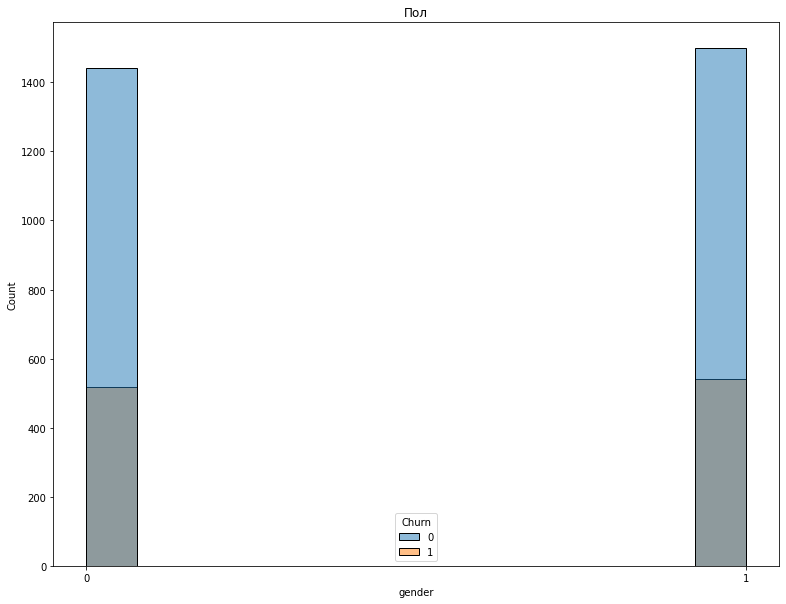

In [14]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="gender", hue="Churn") 
plt.locator_params(axis="x", nbins=2)
plt.title('Пол')
plt.show()

Отток мужчин и женщин примерно одинаковый

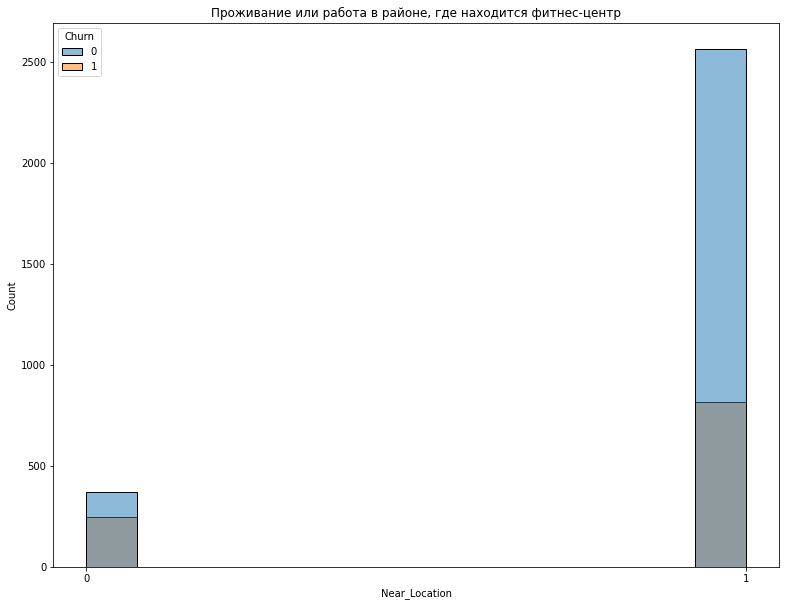

In [16]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Near_Location", hue="Churn") 
plt.locator_params(axis="x", nbins=2)
plt.title('Проживание или работа в районе, где находится фитнес-центр')
plt.show()

Больше тех клиентов, кто ближе живет. И из них, тех кто остался доля намного больше, чем клиентов, которые остались, но живут далеко.

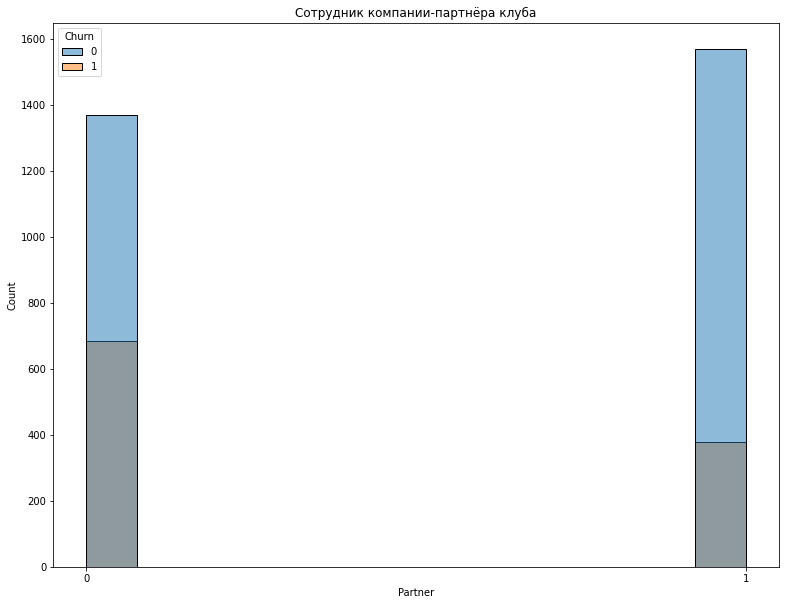

In [17]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Partner", hue="Churn")  
plt.locator_params(axis="x", nbins=2)
plt.title('Сотрудник компании-партнёра клуба')
plt.show()

Тех кто явлется сотрудником компании-партнёра, и тех кто ими не является почти поровну. Но тем не менее Тех кто является сотрудником, чаще остается.

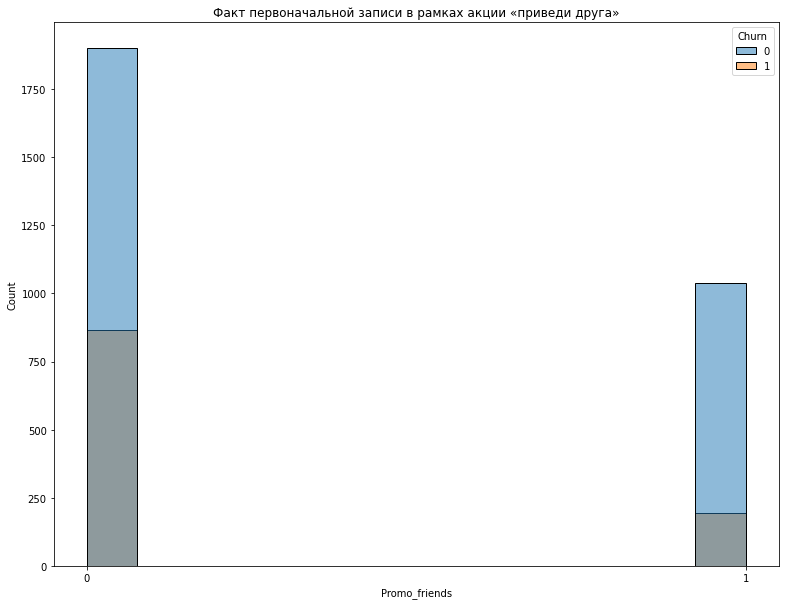

In [18]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Promo_friends", hue="Churn")  
plt.locator_params(axis="x", nbins=2)
plt.title('Факт первоначальной записи в рамках акции «приведи друга»')
plt.show()

Тех кто не учавствовад в акции "приведи друга" больше. Но оставшихся и учавствующих в акции больше.

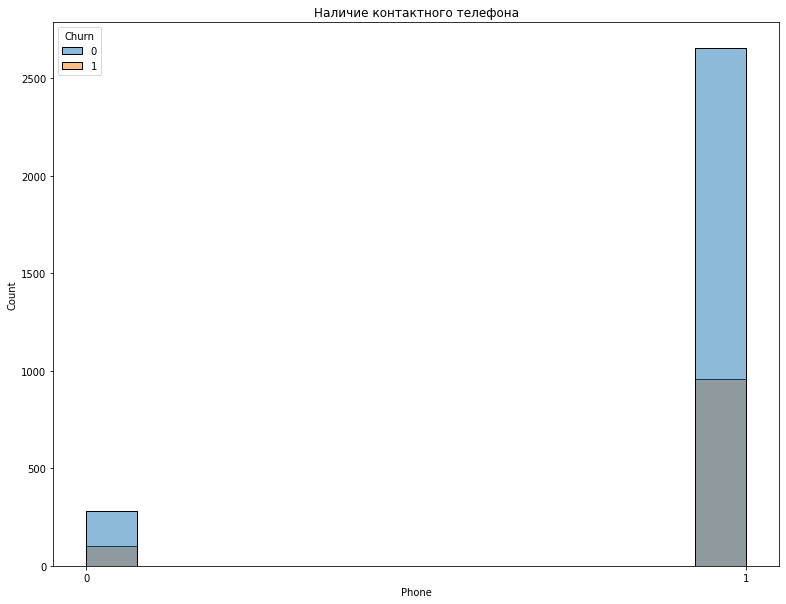

In [19]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Phone", hue="Churn")  
plt.locator_params(axis="x", nbins=2)
plt.title('Наличие контактного телефона')
plt.show()

Тех кто оставил свой контактный телефон, значительно больше. но между ними доля оставшихся и ушедших примерно одинакова.

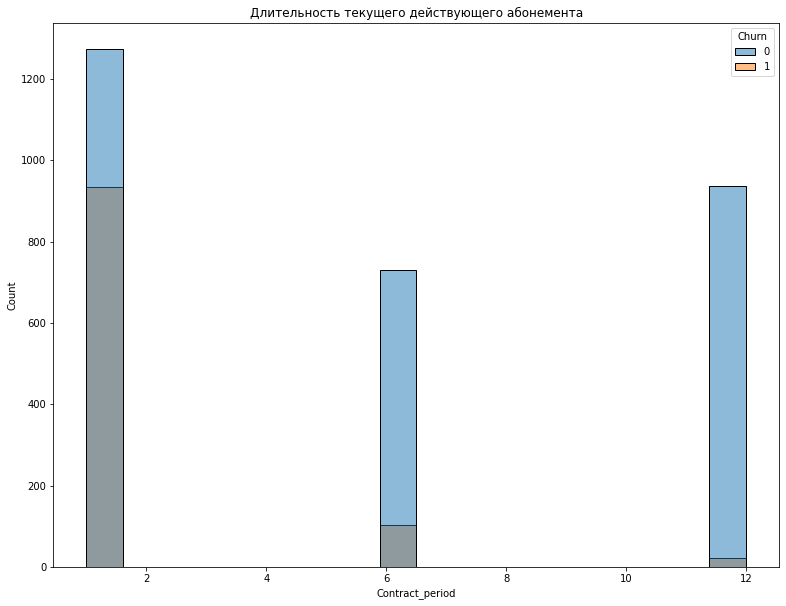

In [20]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Contract_period", hue="Churn")  
plt.title('Длительность текущего действующего абонемента')
plt.show()

Чаще всего остаются с длятельностью абонимента в 12 месяцев. Чаще всего уходят с абониментом в месяц.

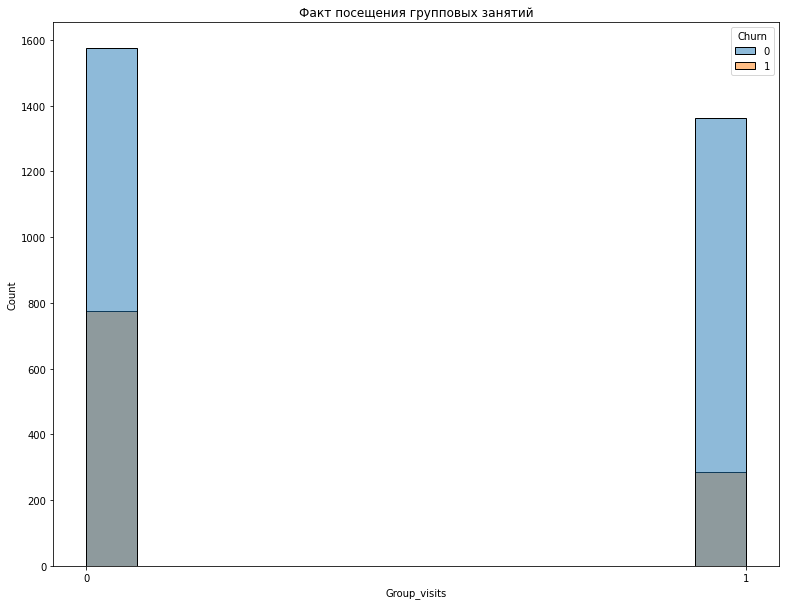

In [21]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Group_visits", hue="Churn")  
plt.locator_params(axis="x", nbins=2)
plt.title('Факт посещения групповых занятий')
plt.show()

Больше тех кто не ходит на груповые занятия. Но те кто ходит остаются чаще.

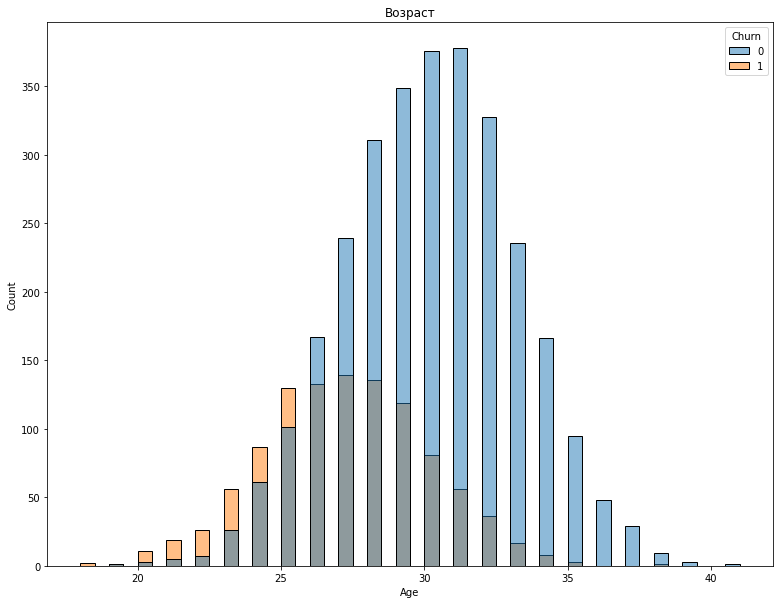

In [22]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Age", hue="Churn")  
plt.title('Возраст')
plt.show()

Чаще всего остаются клиенты в диапазоне старше 25. До 25 лет клиенты склонны с большой вероятностью уйти.

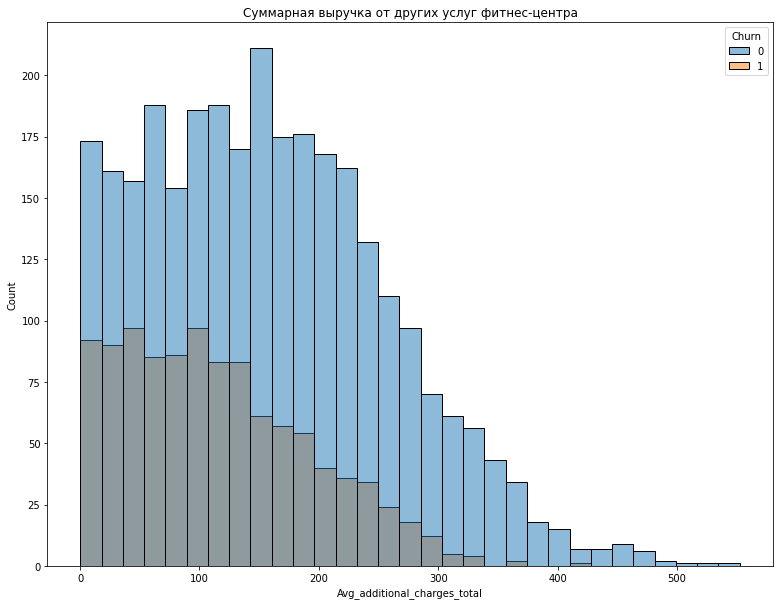

In [23]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Avg_additional_charges_total", hue="Churn")  
plt.title('Суммарная выручка от других услуг фитнес-центра')
plt.show()

В целом доля ушедших/пришедших клиентов не сильно меняется от стоимости услуги. Но резкий спад ее использовая идет после стоимости в примерно 230.

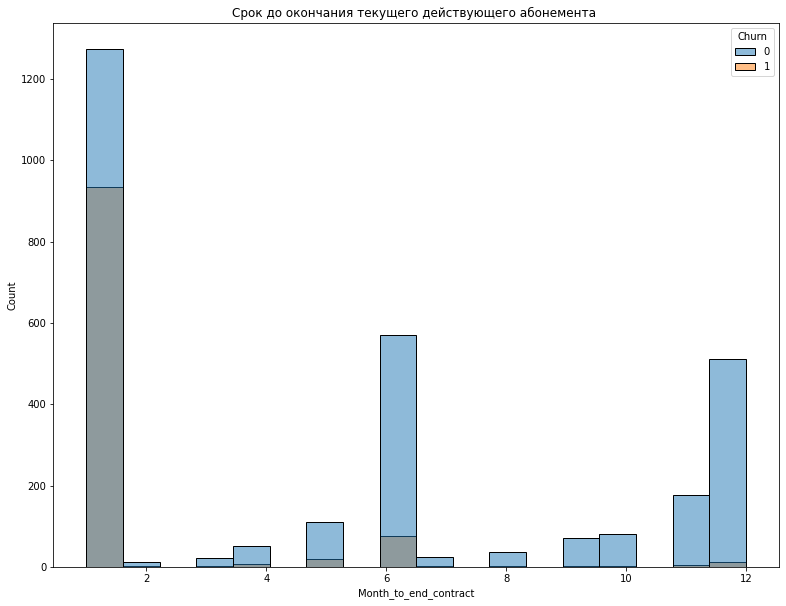

In [24]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Month_to_end_contract", hue="Churn")  
plt.title('Срок до окончания текущего действующего абонемента ')
plt.show()

Чаще всего уходят клиенты, если срок абонимента истекает через месяц.

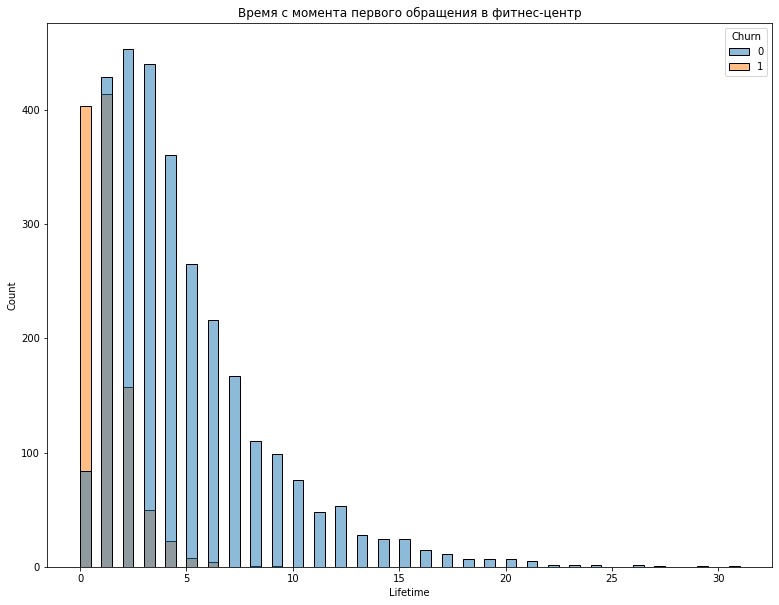

In [25]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Lifetime", hue="Churn")  
plt.title('Время с момента первого обращения в фитнес-центр')
plt.show()

Данная диаграмма похожа на предыдущую. Чем дольше клиент ходит в фитнес клуб, тем меньше вероятность, что он уйдет.Самый большой отток в первый месяц.

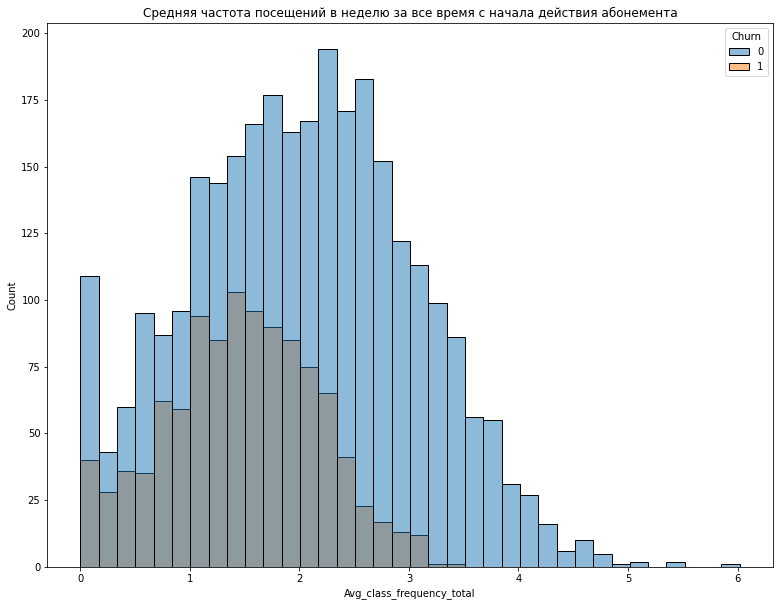

In [26]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Avg_class_frequency_total", hue="Churn")  
plt.title('Средняя частота посещений в неделю за все время с начала действия абонемента')
plt.show()

Чаще всего уходят те, кто ходит меньше 2х раз в месяц.

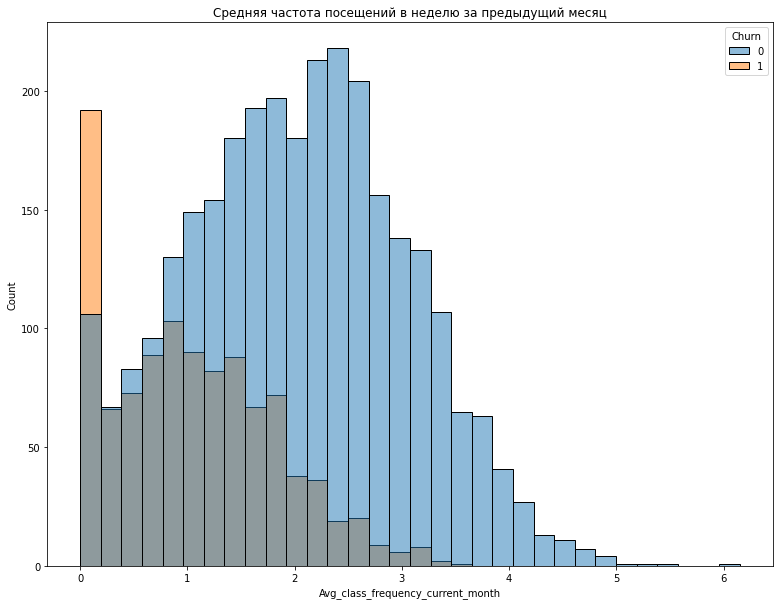

In [27]:
plt.figure(figsize=(13,10))
sns.histplot(data, x="Avg_class_frequency_current_month", hue="Churn")  
plt.title('Средняя частота посещений в неделю за предыдущий месяц')
plt.show()

В целов на данном графике, похожая ситуация как и в предыдущем.

### Построение матрицы корреляции и отобразите её
<a id="d"></a> 

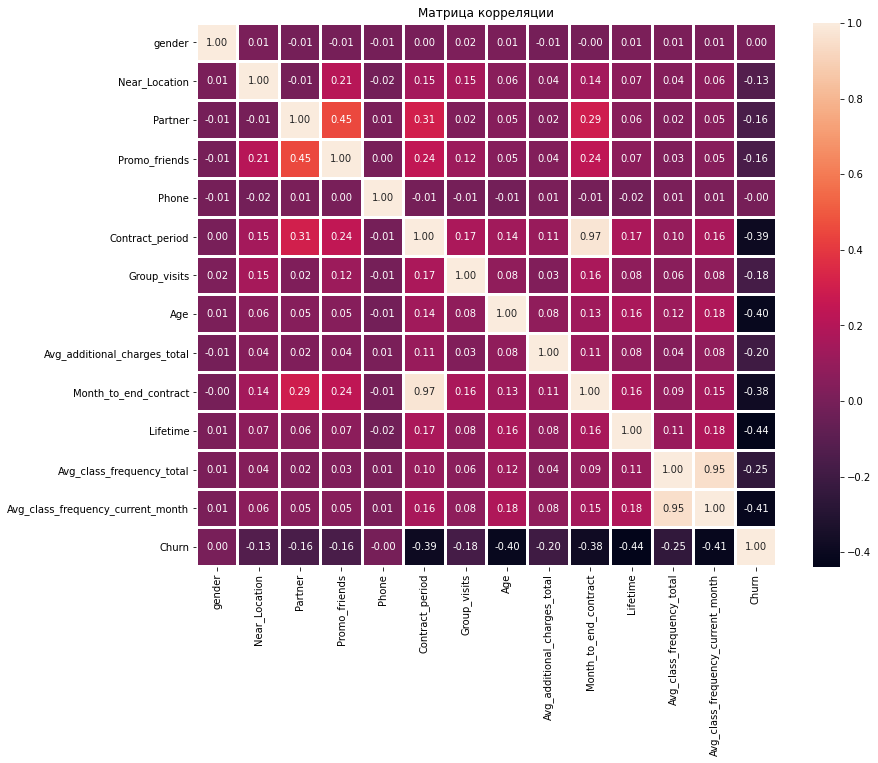

In [31]:
matrices = data.corr()
plt.figure(figsize=(13,10))
sns.heatmap(matrices, annot=True, fmt='.2f', linewidths=2)
plt.title('Матрица корреляции')
plt.show()

**Вывод:**

По матрице корреляции видно, что:

- в целом зависимость очень слабая у параметров `'gender'`, `'Near_Location'`,`'Phone'`, `'Group_visits'`, `Age`, `'Avg_additional_charges_total'`, `'Lifetime'`.
    
- слабая зависимость у параметров: `'Partner'` - `Promo_friends`, `'Partner'` - `'Contract_period'`, `'Partner'` - ,`Promo_friends` - `'Contract_period'`, `Promo_friends` - `'Month_to_end_contract'`.
    
- высокая зависимость у параметров: `'Contract_period'` - `'Month_to_end_contract'` и `'Avg_class_frequency_current_month'` - `'Avg_additional_charges_total'`

## Построение модели прогнозирования оттока клиентов
<a id="model"></a> 

Построение модели бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

In [32]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'): #определение функции 
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

### Разделение данных на обучающую и валидационную выборку функцией `train_test_split()`
<a id="aa"></a> 

In [33]:
X = data.drop('Churn', axis = 1) #разделение данных на признаки и целевую переменную 
y = data['Churn']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
#разделение модели на обучающую и валидационную выборки

### Обучение модели на train-выборке двумя способами
<a id="bb"></a> 

#### Логистическая регрессия
<a id="bba"></a> 

In [35]:
model_1 = LogisticRegression(solver='liblinear') # алгоритм для модели

In [36]:
model_1.fit(X_train, y_train) # обучение модели

LogisticRegression(solver='liblinear')

In [37]:
predictions = model_1.predict(X_test) #прогноз
probabilities = model_1.predict_proba(X_test)[:,1]

In [38]:
print_all_metrics(
    y_test, predictions, probabilities,
    title='Метрики для модели логистическая регрессия:'
) #вывод результата

Метрики для модели логистическая регрессия:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


#### Случайный лес
<a id="bbaa"></a> 

In [39]:
model_2 = RandomForestClassifier(n_estimators = 100, random_state = 0) # алгоритм для модели

In [40]:
model_2.fit(X_train, y_train) # обучение модели

RandomForestClassifier(random_state=0)

In [41]:
predictions_2 = model_2.predict(X_test)
probabilities_2 = model_2.predict_proba(X_test)[:,1] #прогноз

In [42]:
print_all_metrics( 
    y_test, predictions_2, probabilities_2,
    title='Метрики для модели случайный лес:'
) #вывод результата

Метрики для модели случайный лес:
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.80


**Вывод:**

У **логистической регрессии** доля правильных ответов, точность и полнота выше чем у **случайного леса**.

## Кластеризация клиентов
<a id="clustering"></a> 

### Стандартизация данных
<a id="aaa"></a>

In [43]:
sc = StandardScaler() # создание объекта класса StandardScaler

In [44]:
x_sc = sc.fit_transform(X) # применение к обучающей выборке

### Построение матрицы расстояний функцией `linkage()` на стандартизованной матрице признаков и построение дендрограммы
<a id="bbb"></a>

In [45]:
linked = linkage(x_sc, method = 'ward') # построение матрицы расстояний

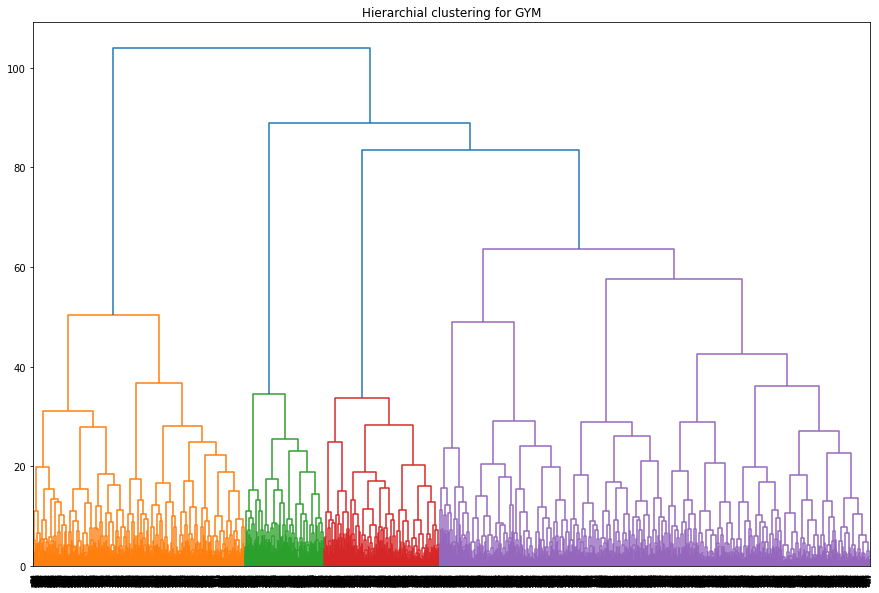

In [46]:
plt.figure(figsize=(15, 10))  # визуализация
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

**Вывод:**

Предложенное оптимальное число кластеров 4.

### Обучение модели кластеризации на основании алгоритма `K-Means` и прогнозирование кластеров клиентов <a id="ccc"></a>

In [47]:
km = KMeans(n_clusters = 5, random_state=0) 
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата

In [48]:
labels = km.fit_predict(x_sc) # применяем алгоритм к данным и формируем вектор кластеров 

In [49]:
data['cluster_km'] = labels # создание нового столбца 'cluster_km'

In [50]:
data.head().T # просмотр 

,0,1,2,3,4
gender,1.00,0.00,0.00,0.00,1.00
Near_Location,1.00,1.00,1.00,1.00,1.00
Partner,1.00,0.00,1.00,1.00,1.00
Promo_friends,1.00,0.00,0.00,1.00,1.00
Phone,0.00,1.00,1.00,1.00,1.00
Contract_period,6.00,12.00,1.00,12.00,1.00
Group_visits,1.00,1.00,0.00,1.00,0.00
Age,29.00,31.00,28.00,33.00,26.00
Avg_additional_charges_total,14.23,113.20,129.45,62.67,198.36
Month_to_end_contract,5.00,12.00,1.00,12.00,1.00


### Просмотр средних значений признаков для кластеров 
<a id="ddd"></a>

In [52]:
data.drop('Churn', axis=1).groupby(['cluster_km']).mean().T.round(2)  # просмотр 

cluster_km,0,1,2,3,4
gender,0.50,0.48,0.52,0.50,0.56
Near_Location,0.00,1.00,0.86,0.96,0.98
Partner,0.46,0.35,0.47,0.78,0.36
Promo_friends,0.08,0.24,0.31,0.57,0.24
Phone,1.00,1.00,0.00,1.00,1.00
Contract_period,2.35,1.95,4.79,10.92,2.69
Group_visits,0.22,0.34,0.43,0.55,0.47
Age,28.48,28.17,29.30,29.99,30.11
Avg_additional_charges_total,135.46,131.44,143.96,160.88,161.67
Month_to_end_contract,2.20,1.86,4.48,9.98,2.48


**Выводы:**

**Кластер 0** - все живут далеко от фитнес-центра. Самый маленький процент (8%) первоначальной записи в рамках акции «приведи друга». Самый маленький процент (22%) посещения групповых занятий.

**Кластер 1** - живут очень близко от фитнес-центра. Самый маленький процент (35%) сотрудников компании-партнёров клуба. Самая маленькая  длительность текущего действующего абонемента(1,95). Самый маленький средний возраст (28,17). Меньше всего суммарная средняя выручка от других услуг фитнес-центра(131,44). Самый маленький срок до окончания текущего действующего абонемента(1,86). Самое маленькое время с момента первого обращения в фитнес-центр(2,43). Самая маленькая средняя частота посещений в неделю за все время с начала действия абонемента(1,25). Самая маленькая средняя частота посещений в неделю за предыдущий месяц(1,1)

**Кластер 2** - не оставили контактные телефоны.

**Кластер 3** - самый большой процент(78%) сотрудников компаний-партнёров клуба. Самый большой процент(57%) первоначальной записи в рамках акции «приведи друга». Самая большая длительность текущего действующего абонемента(10,92). Самый большой процент (55%) посещения групповых занятий. Самый большой срок (9,98) срок до окончания текущего действующего абонемента.

**Кластер 4** - самый большой средний возраст(30.11). Самая большая суммарная средняя выручка от других услуг фитнес-центра (161,67). Самое большое  время с момента первого обращения в фитнес-центр(4,89). Самая большая  средняя частота посещений в неделю за предыдущий месяц(2,85). Самая большая средняя частота посещений в неделю за предыдущий месяц(2,85).

### Построение распределения признаков для кластеров
<a id="eee"></a>

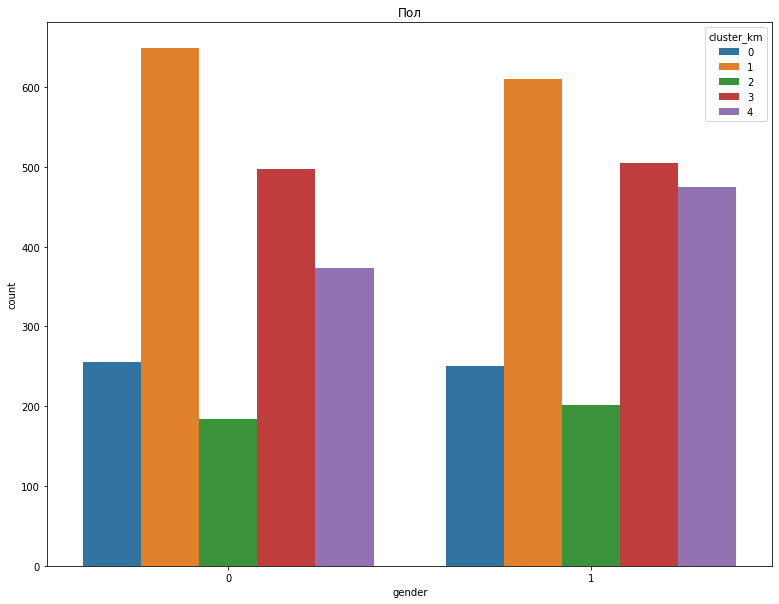

In [53]:
plt.figure(figsize=(13,10))
sns.countplot(x=data["gender"], hue='cluster_km', data = data)
plt.title('Пол')
plt.show()

Больше всего мужчин и женщин в кластере 1, меньше всего в кластере 2.

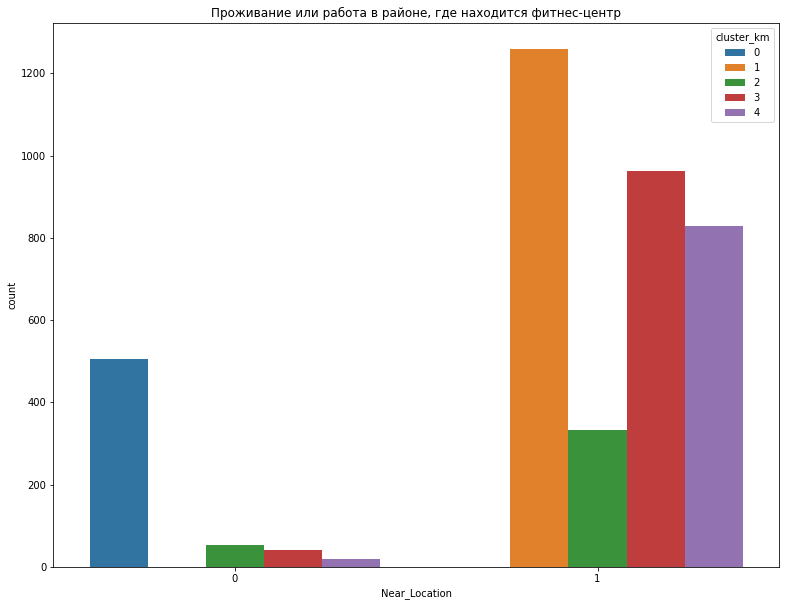

In [55]:
plt.figure(figsize=(13,10))
sns.countplot(x=data["Near_Location"], hue='cluster_km', data = data)
plt.title('Проживание или работа в районе, где находится фитнес-центр')
plt.show()

Многие живут долеко от фитнес центра. Но дальше всего 1 кластер, ближе всего 0 кластер.

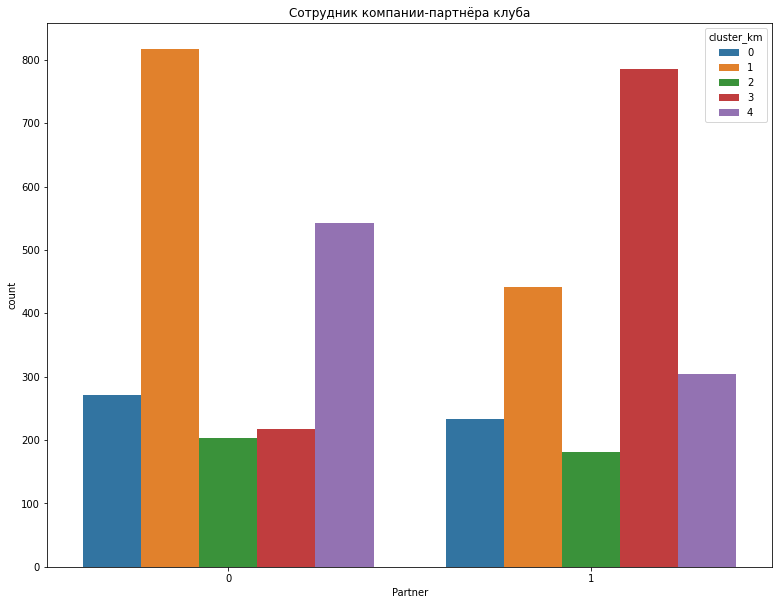

In [56]:
plt.figure(figsize=(13,10))
sns.countplot(x=data["Partner"], hue='cluster_km', data = data)  
plt.title('Сотрудник компании-партнёра клуба')
plt.show()

Больше всего сотрудников компании-партнёров клуба в 3м кластере, мень всего в 1м кластере.

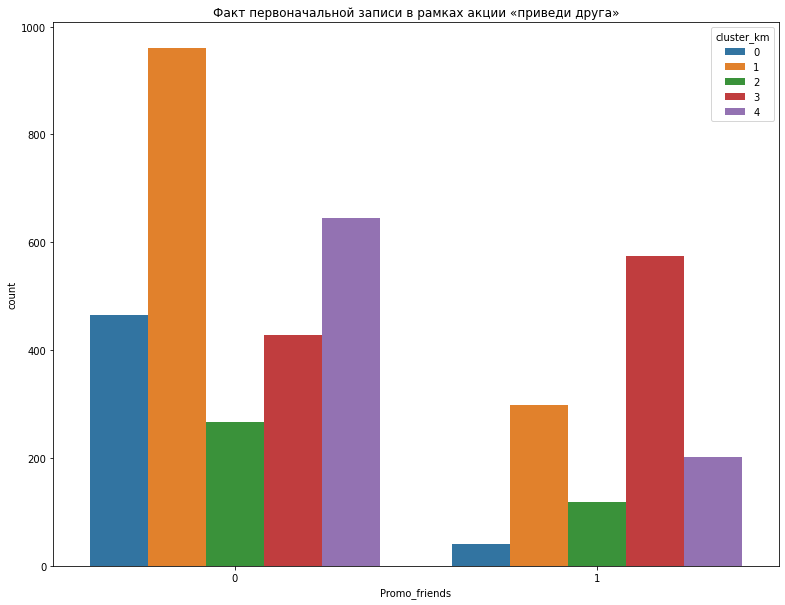

In [57]:
plt.figure(figsize=(13,10))
sns.countplot(x=data["Promo_friends"], hue='cluster_km', data = data)  
plt.title('Факт первоначальной записи в рамках акции «приведи друга»')
plt.show()

Больше всего людей не уваствовали в первоначальной записи в рамках акции «приведи друга» из 1го кластера. Больше всего учавствовали из 3го кластера.

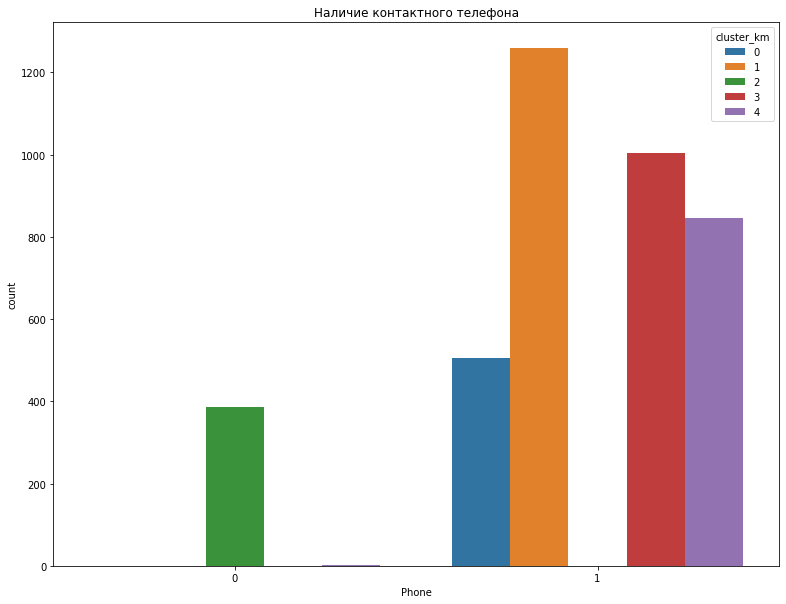

In [58]:
plt.figure(figsize=(13,10))
sns.countplot(x=data["Phone"], hue='cluster_km', data = data)  
plt.title('Наличие контактного телефона')
plt.show()

У 2го кластера отсутствуют номера мобильных телефонов.

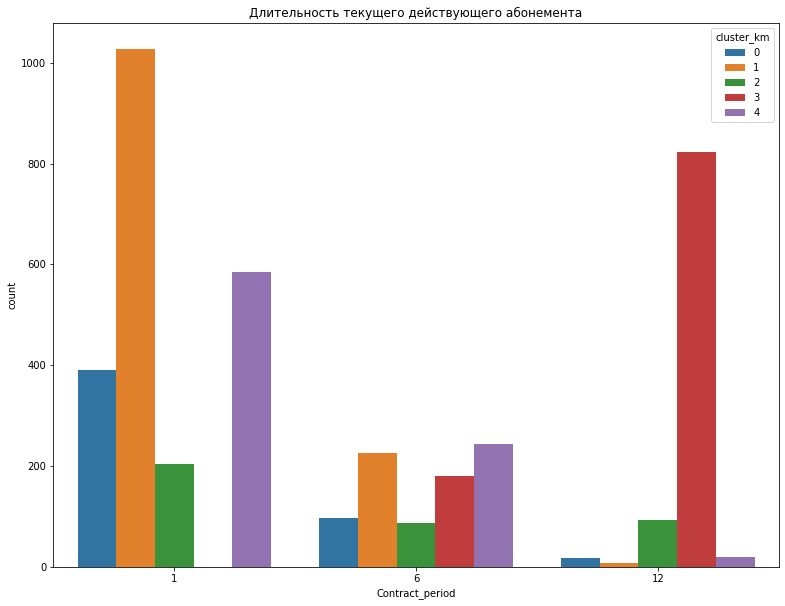

In [60]:
plt.figure(figsize=(13,10))
sns.countplot(x=data["Contract_period"], hue='cluster_km', data = data)  
plt.title('Длительность текущего действующего абонемента')
plt.show()

Самая меньшая длительность текущего действующего абонемента у 1го кластера. Самая бобльшая длительность текущего действующего абонемента у 3го кластера.

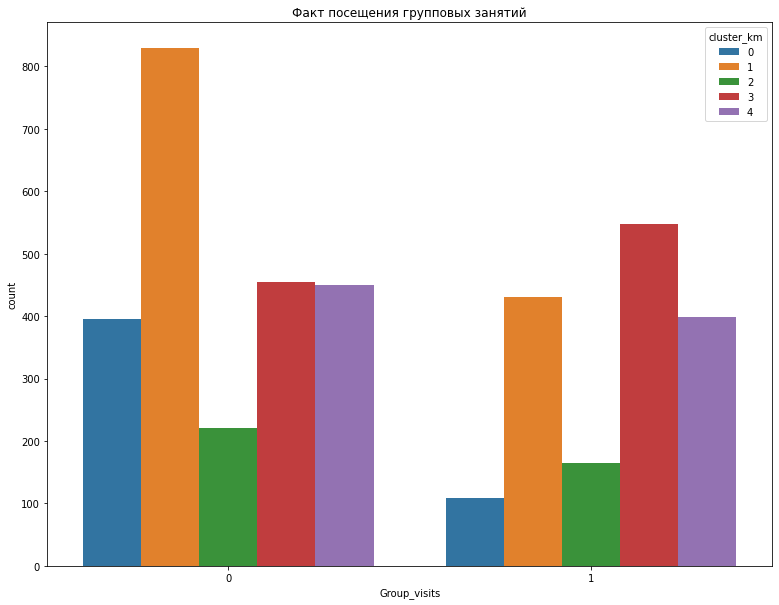

In [61]:
plt.figure(figsize=(13,10))
sns.countplot(x=data["Group_visits"], hue='cluster_km', data = data)  
plt.title('Факт посещения групповых занятий')
plt.show()

Больше всего не ходят на груповые зантия из 1го кластера, аще всего ходят из 3го кластера.

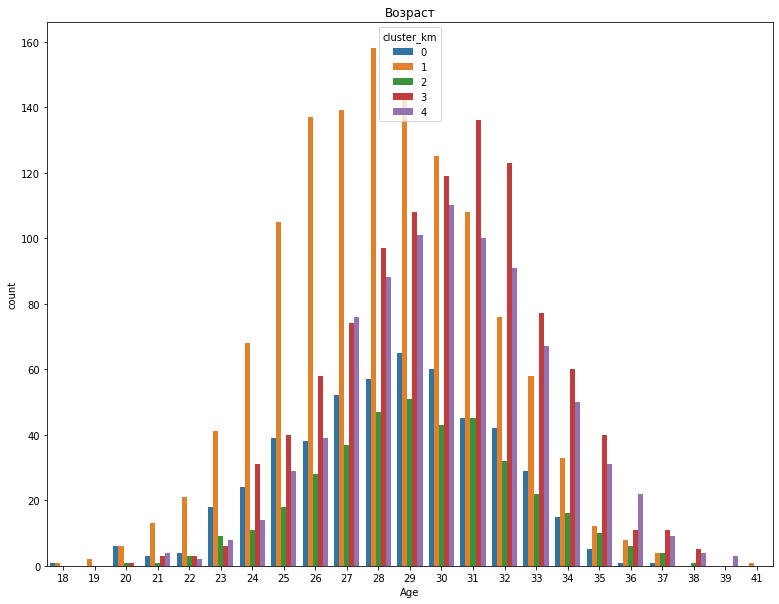

In [63]:
plt.figure(figsize=(13,10))
sns.countplot(x=data["Age"], hue='cluster_km', data = data)  
plt.title('Возраст')
plt.show()

Больше всего людей до 30 лет в 1м кластере, больше 30 лет в 3м кластере.

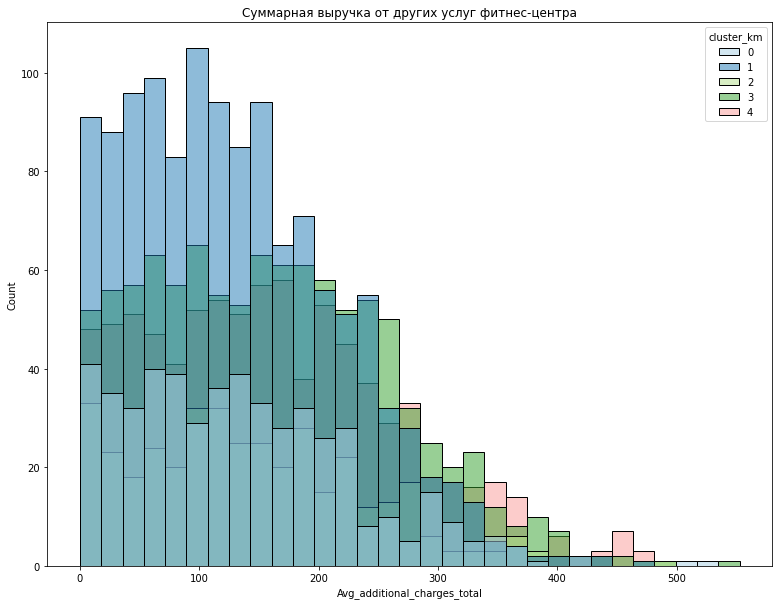

In [80]:
plt.figure(figsize=(13,10))
sns.histplot(data,palette="Paired", x="Avg_additional_charges_total", hue="cluster_km") 
plt.title('Суммарная выручка от других услуг фитнес-центра')
plt.show()

В первом кластере суммарная выручка от других услуг фитнес-центра высока до 200. Больше всего выручки идет от 4го кластера.

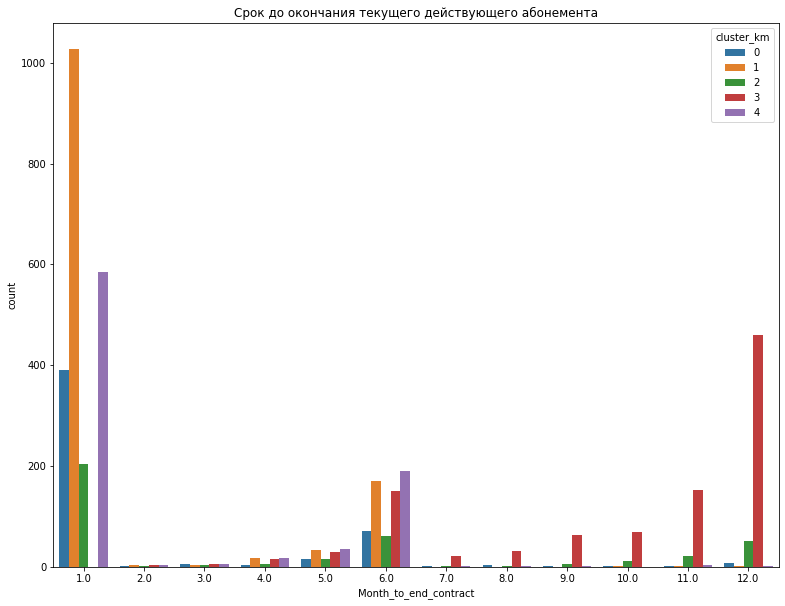

In [82]:
plt.figure(figsize=(13,10))
sns.countplot(x=data["Month_to_end_contract"], hue='cluster_km', data = data)  
plt.title('Срок до окончания текущего действующего абонемента')
plt.show()

Самый маленький срок до окончания текущего действующего абонемента у первого кластрера. Самый большой срок до окончания текущего действующего абонемента у третьего.

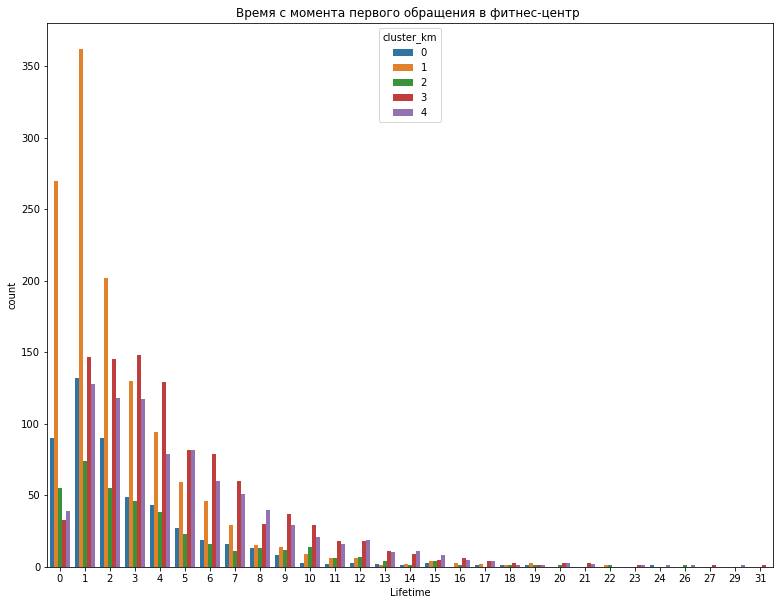

In [83]:
plt.figure(figsize=(13,10))
sns.countplot(x=data["Lifetime"], hue='cluster_km', data = data)  
plt.title('Время с момента первого обращения в фитнес-центр ')
plt.show()

До 4го месяца лидирует 1й кластер, до 11го больше всего занимается преимущественно 3й кластер, дальше преимущественно 4й кластер.

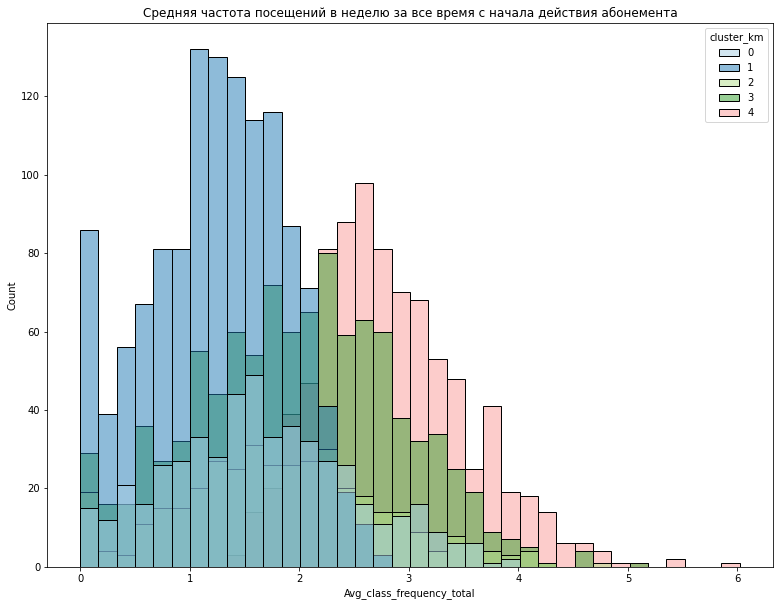

In [85]:
plt.figure(figsize=(13,10))
sns.histplot(data,palette="Paired", x="Avg_class_frequency_total", hue="cluster_km") 
plt.title('Средняя частота посещений в неделю за все время с начала действия абонемента')
plt.show()

До 2х дней в неделю чаще всего занимается 1й кластер. Более 2х раз в неделю 4й.

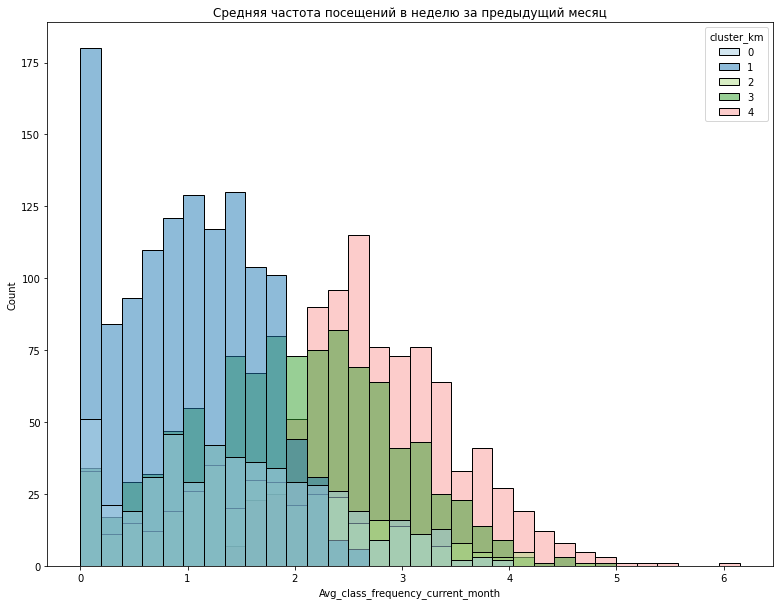

In [87]:
plt.figure(figsize=(13,10))
sns.histplot(data,palette="Paired", x="Avg_class_frequency_current_month", hue="cluster_km")  
plt.title('Средняя частота посещений в неделю за предыдущий месяц')
plt.show()

На данном графике в целом ситуация такая же как и на предыдущем.

### Для каждого полученного кластера подсчет доли оттока
<a id="fff"></a>

In [88]:
outflow_cluster = data.query('Churn==1').groupby('cluster_km')['Churn'].count() / data.query('Churn==1')['Churn'].count()
 # подсчет доли оттока

In [97]:
outflow_cluster.round(2)  # просмотр 

cluster_km
0    0.21
1    0.61
2    0.10
3    0.03
4    0.05
Name: Churn, dtype: float64

/tmp/ipykernel_207/3669922157.py:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(outflow_cluster.values, labels = outflow_cluster.index, autopct='%1.1f%%')


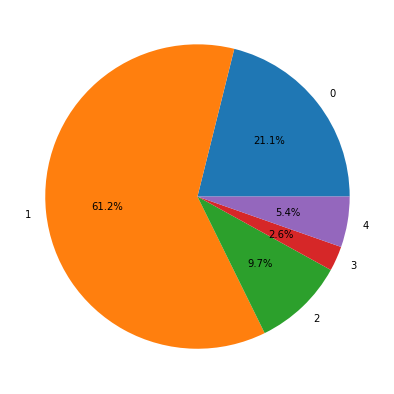

In [101]:
fig = plt.figure(figsize =(10, 7))
plt.pie(outflow_cluster.values, labels = outflow_cluster.index, autopct='%1.1f%%')
plt.show()

Самый большой отток происходит из кластера 1 он самый не надежный. Самый маленький отток из кластеров 3 и 4, они самые надежные.

## Выводы
<a id="aaaa"></a> 

При загрузке данных было видно, что:

 В датасете все типы данных правильные. В типе данных `float64`, колличество знаков после запятой было уменьшено до 2х.

При пороверки датасета на отсутствующие значения (пропуски), было выяснено, что:

 В датасете пропусков обнаружено не было. Так же не выявлено явных дубликатов. Стандартное отклонение в в большенстве колонок близко к среднему значению, на первый взгля явных выбросов не видно.

При просмотре среднего значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался, стало видно, что:

- `gender`: у данного столбца одинаковые показатель оттока/притока тем самым можно сказать, что данный признак не является показательным.
- `Near_Location`: данный признак находится на большом показателе, что говорит о том что по нему большой процент оттока и притока клиентов. Но сами показатели равноценны, из-за чего можно сказать, что они сильно не влияют на клиентов.
- `Partner`: по показателям оттока/притока данного столбца, можно сказать, что сотрудники компании-партнёра остаются чаще чем обычные посетители.
- `Promo_friends`: показатель данного столбца ниже среднего, что говорит о маленькои оттоке/притоке. Но тем не менее тот кто прходит в рамках акции, остается чаще.
- `Phone`: наличие контактного телифона не влияет на отток/приток. Но показатели довольно высоки.
- `Contract_period`: длительность текущего действующего абонемента явно влияет на отток/приток клиентов. Клиенты с абониментами уходят реже.
- `Group_visits`: у этого признака, показатель оттока/притока очень маленький. И можно сказать что он не влияет на клиентов.
- `Age`: показатель возрастра тоже особо не влияет на отток/приток клиентов.
- `Avg_additional_charges_total`:  суммарная выручка от других услуг фитнес-центра влияет так, что клиенты которые пользуются услугами, остаются чаще.
- `Month_to_end_contract`: клиенты чаще остаются, если у них есть время до окончания абонимента.
- `Lifetime`: время с момента первого обращения в фитнес-центр явно показывает, что чем дольше человек занимается, тем больше вероятность что он уйдет.
- `Avg_class_frequency_total`: средняя частота посещений в неделю за все время с начала действия абонемента не сильно влияет, но те кто ходет реже уходят чаще.
- `Avg_class_frequency_current_month`: но если рассматривать среднюю частоту посещений в неделю за предыдущий месяц, то можно сделать логичное заключение. Кто стал ходить меньше, тот с большей вероятностью уйдет.

При построении матрицы корреляции стало видно, что:

- в целом зависимость очень слабая у параметров `'gender'`, `'Near_Location'`,`'Phone'`, `'Group_visits'`, `Age`, `'Avg_additional_charges_total'`, `'Lifetime'`.
    
- слабая зависимость у параметров: `'Partner'` - `Promo_friends`, `'Partner'` - `'Contract_period'`, `'Partner'` - ,`Promo_friends` - `'Contract_period'`, `Promo_friends` - `'Month_to_end_contract'`.
    
- высокая зависимость у параметров: `'Contract_period'` - `'Month_to_end_contract'` и `'Avg_class_frequency_current_month'` - `'Avg_additional_charges_total'`

При Обучение модели на train-выборке двумя способами, было вяснено, что : У **логистической регрессии** доля правильных ответов, точность и полнота выше чем у **случайного леса**.

При посторении матрицы расстояний функцией `linkage()`, предложенное оптимальное число кластеров **4**.

**Кластер 0** - все живут далеко от фитнес-центра. Самый маленький процент (8%) первоначальной записи в рамках акции «приведи друга». Самый маленький процент (22%) посещения групповых занятий.

**Кластер 1** - живут очень близко от фитнес-центра. Самый маленький процент (35%) сотрудников компании-партнёров клуба. Самая маленькая  длительность текущего действующего абонемента(1,95). Самый маленький средний возраст (28,17). Меньше всего суммарная средняя выручка от других услуг фитнес-центра(131,44). Самый маленький срок до окончания текущего действующего абонемента(1,86). Самое маленькое время с момента первого обращения в фитнес-центр(2,43). Самая маленькая средняя частота посещений в неделю за все время с начала действия абонемента(1,25). Самая маленькая средняя частота посещений в неделю за предыдущий месяц(1,1)

**Кластер 2** - не оставили контактные телефоны.

**Кластер 3** - самый большой процент(78%) сотрудников компаний-партнёров клуба. Самый большой процент(57%) первоначальной записи в рамках акции «приведи друга». Самая большая длительность текущего действующего абонемента(10,92). Самый большой процент (55%) посещения групповых занятий. Самый большой срок (9,98) срок до окончания текущего действующего абонемента.

**Кластер 4** - самый большой средний возраст(30.11). Самая большая суммарная средняя выручка от других услуг фитнес-центра (161,67). Самое большое  время с момента первого обращения в фитнес-центр(4,89). Самая большая  средняя частота посещений в неделю за предыдущий месяц(2,85). Самая большая средняя частота посещений в неделю за предыдущий месяц(2,85).

Самый большой отток происходит из кластера 1 он самый не надежный. Самый маленький отток из кластеров 3 и 4, они самые надежные.